<a href="https://colab.research.google.com/github/Vatsal-ai-Neema/Credit-Underwriting-Model/blob/main/BASIC_CODE_AND_STRUCTURE_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix,precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 1: Load the dataset

df = pd.read_csv("/content/sample_data/Dataset 1.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Step 2: Exploratory Data Analysis (EDA)

df.shape

(614, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


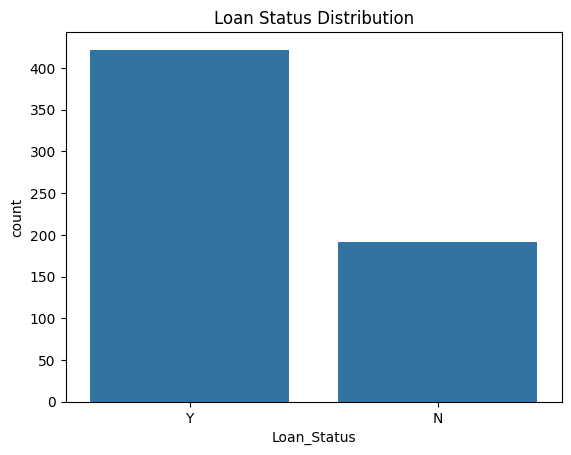

In [ ]:
# Visualizing class distribution

sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Status Distribution')
plt.show()

In [ ]:
df.Loan_ID.value_counts(dropna=False)

,count
Loan_ID,
LP001002,1
LP002328,1
LP002305,1
LP002308,1
LP002314,1
...,...
LP001692,1
LP001693,1
LP001698,1


In [ ]:
# Step 3: Data Preprocessing
# Fill missing values with forward fill method

df['Gender'] = df['Gender'].ffill()
df['Married'] = df['Married'].ffill()
df['Dependents'] = df['Dependents'].ffill()
df['Self_Employed'] = df['Self_Employed'].ffill()
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].ffill()
df['Credit_History'] = df['Credit_History'].ffill()

# Encode categorical variables

label_encoders = {}
for column in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [ ]:
# Step 4: Feature Engineering
# Creating a new feature: Debt_to_Income Ratio,Total_income.

df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['Debt_Income_Ratio'] = df['LoanAmount'] / df['Total_Income']

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income', 'Debt_Income_Ratio'],
      dtype='object')

In [ ]:
df.Total_Income.value_counts(dropna=False)

,count
Total_Income,
6000.0,5
3750.0,4
4583.0,4
2500.0,4
8334.0,3
...,...
4923.0,1
5100.0,1
11000.0,1


In [ ]:
df.Debt_Income_Ratio.value_counts(dropna=False)

,count
Debt_Income_Ratio,
0.026667,2
0.022000,2
0.031250,2
0.020645,2
0.025181,2
...,...
0.027223,1
0.024661,1
0.008454,1


In [ ]:
# Feature and target selection
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(491, 13)
(123, 13)
(491,)
(123,)


In [ ]:
print(y.value_counts())

Loan_Status
1    422
0    192
Name: count, dtype: int64


In [ ]:
#Step 5: Model Building
# Using Gradient Boosting Classifier

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
#Step 6: Model Evaluation
# Predictions

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

Accuracy: 0.83
ROC-AUC: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.68      0.71        38
           1       0.86      0.89      0.88        85

    accuracy                           0.83       123
   macro avg       0.80      0.79      0.80       123
weighted avg       0.83      0.83      0.83       123



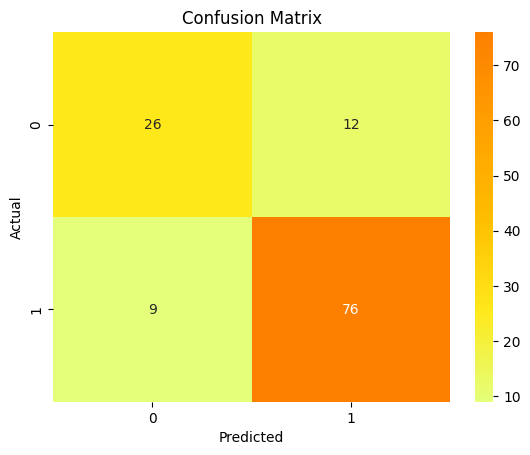

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Wistia')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#Using Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
#Model Evaluation
# Predictions

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

Accuracy: 0.85
ROC-AUC: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.68      0.74        38
           1       0.87      0.93      0.90        85

    accuracy                           0.85       123
   macro avg       0.84      0.81      0.82       123
weighted avg       0.85      0.85      0.85       123



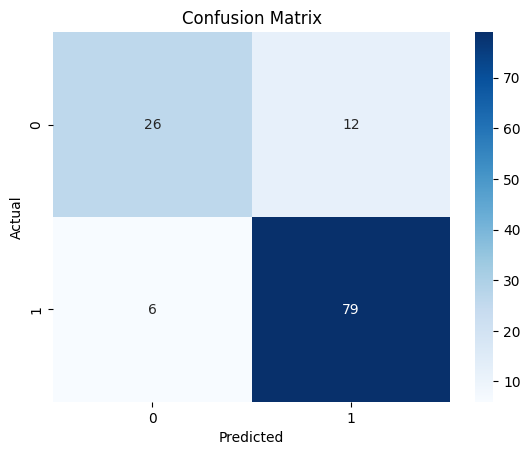

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#Using Decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
#Model Evaluation
# Predictions

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

Accuracy: 0.77
ROC-AUC: 0.77

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.76      0.67        38
           1       0.88      0.78      0.82        85

    accuracy                           0.77       123
   macro avg       0.74      0.77      0.75       123
weighted avg       0.79      0.77      0.78       123



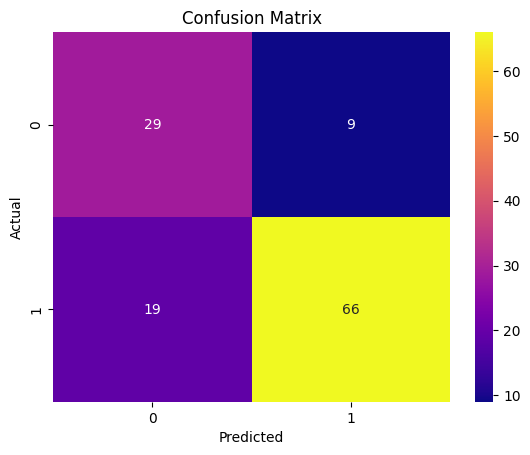

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='plasma')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#Using logistic regreesion
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
#Model Evaluation
# Predictions

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

Accuracy: 0.85
ROC-AUC: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.58      0.71        38
           1       0.84      0.98      0.90        85

    accuracy                           0.85       123
   macro avg       0.88      0.78      0.81       123
weighted avg       0.86      0.85      0.84       123



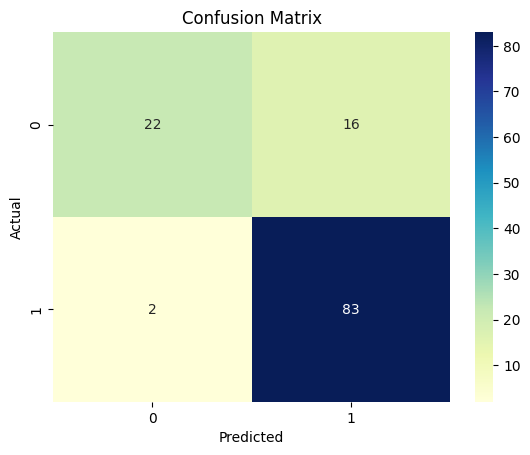

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#Using SVM
from sklearn.svm import SVC
model = SVC(random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
#Model Evaluation
# Predictions

y_pred = model.predict(X_test)
# Instead of assigning the model object to y_proba,
# call the decision_function to get the decision scores.
y_proba = model.decision_function(X_test)
accuracy= accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

Accuracy: 0.85
ROC-AUC: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.55      0.69        38
           1       0.83      0.98      0.90        85

    accuracy                           0.85       123
   macro avg       0.87      0.76      0.79       123
weighted avg       0.86      0.85      0.83       123



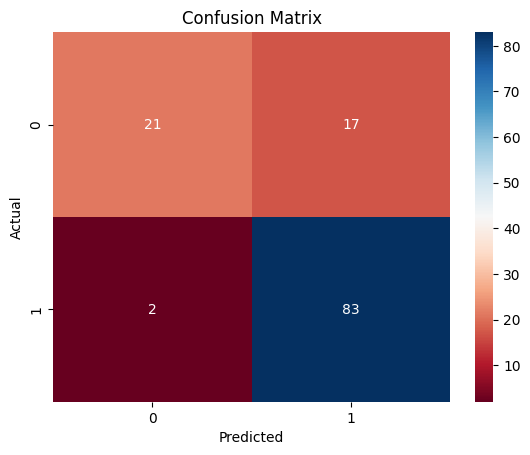

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='RdBu')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#Using KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#Model Evaluation
# Predictions

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

Accuracy: 0.84
ROC-AUC: 0.78

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.63      0.71        38
           1       0.85      0.93      0.89        85

    accuracy                           0.84       123
   macro avg       0.82      0.78      0.80       123
weighted avg       0.83      0.84      0.83       123



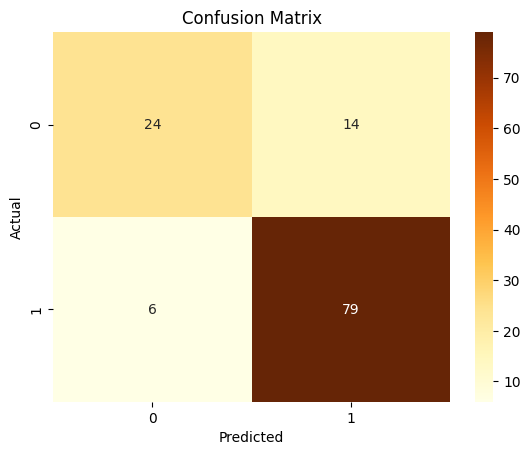

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlOrBr')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#Using Naive-Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
#Model Evaluation
# Predictions

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

Accuracy: 0.85
ROC-AUC: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.61      0.71        38
           1       0.84      0.95      0.90        85

    accuracy                           0.85       123
   macro avg       0.85      0.78      0.80       123
weighted avg       0.85      0.85      0.84       123



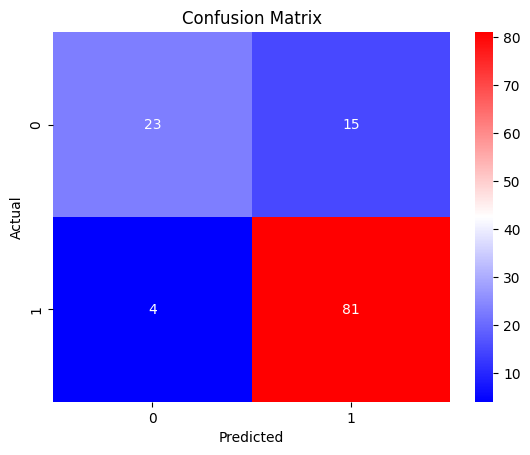

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='bwr')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Feature Variances (Class 0):
              Feature  Variance
6   CoapplicantIncome  2.076774
9      Credit_History  1.832751
11       Total_Income  1.445090
5     ApplicantIncome  1.303211
8    Loan_Amount_Term  1.223545
10      Property_Area  1.175735
3           Education  1.150288
12  Debt_Income_Ratio  1.149698
1             Married  1.050622
4       Self_Employed  1.001701
2          Dependents  0.977150
0              Gender  0.945559
7          LoanAmount  0.864612


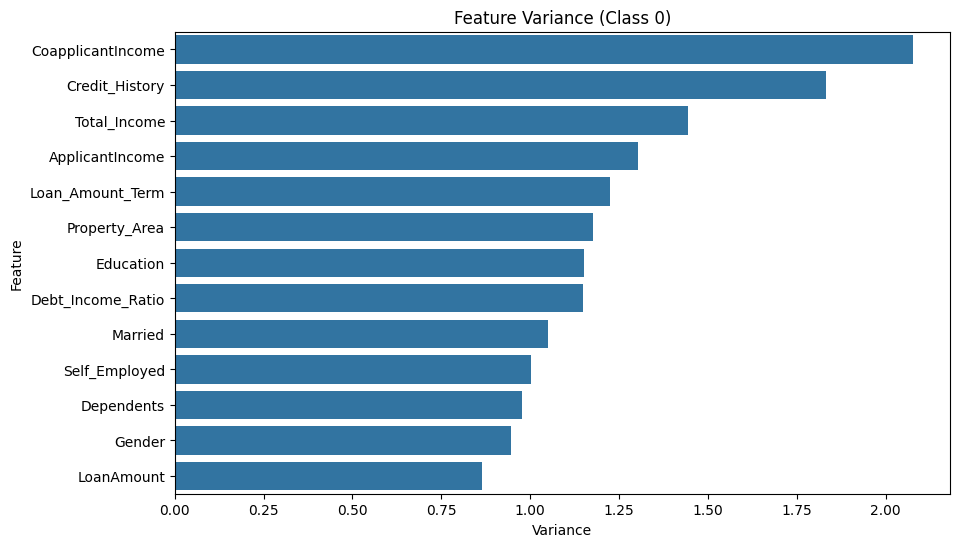

In [ ]:
# Feature Importance
# Instead of using feature_importances_,
# let's analyze feature variances or coefficients.

# For Gaussian Naive Bayes, you can examine the variance of each feature within each class to get an idea of feature importance. Features with higher variance within
# a class tend to be more discriminative.

feature_variances = pd.DataFrame({'Feature': X.columns, 'Variance': model.var_[0]})
# Assuming you're interested in the variance for class 0

feature_variances = feature_variances.sort_values(by='Variance', ascending=False)
print("\nFeature Variances (Class 0):")
print(feature_variances)

plt.figure(figsize=(10, 6))
sns.barplot(x='Variance', y='Feature', data=feature_variances)
plt.title('Feature Variance (Class 0)')
plt.show()

# Alternatively, you can explore other techniques like
# permutation importance for feature importance analysis
# with Gaussian Naive Bayes.

Training and Evaluating: LogisticRegression
Training and Evaluating: DecisionTreeClassifier
Training and Evaluating: RandomForestClassifier
Training and Evaluating: GradientBoostingClassifier
Training and Evaluating: KNeighborsClassifier
Training and Evaluating: SVC
Training and Evaluating: GaussianNB

Model Comparison:
                        Model  Accuracy  Precision    Recall  F1 Score  \
2      RandomForestClassifier  0.861789   0.877778  0.929412  0.902857   
0          LogisticRegression  0.853659   0.838384  0.976471  0.902174   
5                         SVC  0.845528   0.830000  0.976471  0.897297   
6                  GaussianNB  0.845528   0.843750  0.952941  0.895028   
4        KNeighborsClassifier  0.837398   0.849462  0.929412  0.887640   
3  GradientBoostingClassifier  0.829268   0.863636  0.894118  0.878613   
1      DecisionTreeClassifier  0.723577   0.859155  0.717647  0.782051   

    ROC-AUC  
2  0.846904  
0  0.832817  
5  0.844892  
6  0.815480  
4  0.780960  
3

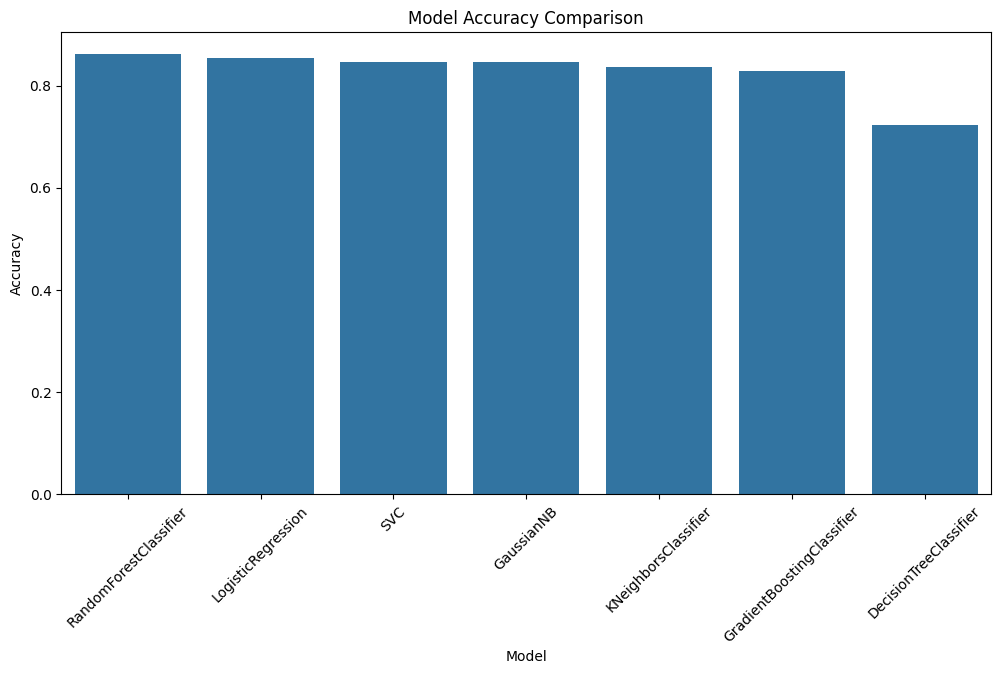

In [ ]:
# Define models
models = [
    LogisticRegression(max_iter=500),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    SVC(probability=True),
    GaussianNB(),
]

# Initialize a list to store results
results = []

# Evaluate each model
for model in models:
    model_name = model.__class__.__name__
    print(f"Training and Evaluating: {model_name}")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    # Append results
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC-AUC": roc_auc
    })

# Create a DataFrame for comparison
results_df = pd.DataFrame(results)

# Sort by Accuracy (or any other metric)
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Display the comparison table
print("\nModel Comparison:")
print(results_df)

# Bar plot for comparison
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()

In [ ]:
def predict_creditworthiness(input_data):
    """
    Predict creditworthiness for a single input.
    :param input_data: List of input feature values
    :return: Predicted loan status
    """
    # Convert input to a DataFrame with column names matching the training data
    input_df = pd.DataFrame([input_data], columns=X.columns)

    # Scale the input features
    scaled_input = scaler.transform(input_df)

    # Make the prediction
    prediction = model.predict(scaled_input)

    # Decode the prediction back to its original label
    return label_encoders['Loan_Status'].inverse_transform(prediction)


In [ ]:
print(X.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Total_Income',
       'Debt_Income_Ratio'],
      dtype='object')


In [ ]:
example_input = [1, 1, 0, 0, 0, 6000, 2000, 150, 360, 1, 5, 8000, 0.01875]
predicted_status = predict_creditworthiness(example_input)
print("Predicted Loan Status:", predicted_status)

Predicted Loan Status: ['Y']


ADDING MORE FEATURES IN DATASET

In [ ]:
df['Education_Employment'] = df['Education'].astype(str) + "_" + df['Self_Employed'].astype(str)

In [ ]:
income_mean_by_area = df.groupby('Property_Area')['ApplicantIncome'].transform('mean')
df['Mean_Income_by_Area'] = income_mean_by_area

In [ ]:
print("New Dataset")
print(df.head())

New Dataset
    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001002       1        0           0          0              0   
1  LP001003       1        1           1          0              0   
2  LP001005       1        1           0          0              1   
3  LP001006       1        1           0          1              0   
4  LP001008       1        0           0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Property_Area  Loan_Status  Total_Income  \
0             1.0              2            1        5849.0   
1             

In [ ]:
df.shape

(614, 17)